#download libraries

In [ ]:
# ..examine the characteristics of the dataset
# ..develop code for text preprocessing techniques to process the dataset
# ..incorporate text vectorization to retrieve resumes
# ..trains and validates a BERT model to classify
# ..optimize and enhance on the performance
# ..summarize the retrieved resumes

In [ ]:
# !pip install nltk
# !pip install tensorflow
# !pip install torch

#import libraries

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/NLPDATA/UpdatedResumeDataSet_T3_2.csv"

#characteristics of dataset

In [ ]:
data=pd.read_csv(path)
category=data["Category"].unique()
print(f"shape of dataset;\t{data.shape} \ttotal resumes= {data.shape[0]}\n\nnumber of duplicates=\t{data.duplicated().sum()}\nunique resumes=\t{data.shape[0]-data.duplicated().sum()}\npercentage of dataset is not duplicated; {100-((data.duplicated().sum() / data.shape[0]) * 100)}\n\ncolumns of dataset;\t{data.columns}\n\nnumber of categories=\t{len(category)}\n\ncategories found;\n{category}")

shape of dataset;	(9595, 2) 	total resumes= 9595

number of duplicates=	9406
unique resumes=	189
percentage of dataset is not duplicated; 1.9697759249609135

columns of dataset;	Index(['Category', 'Resume'], dtype='object')

number of categories=	25

categories found;
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


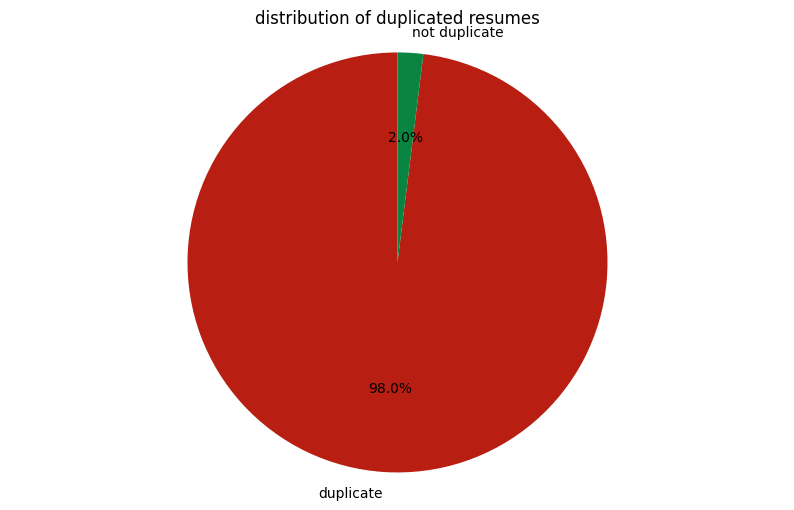

In [ ]:
#percentage of dataset is duplicated
plt.figure(figsize=(10, 6))
f=[data.duplicated().sum(),data.shape[0]-data.duplicated().sum()]
labels = ['duplicate', 'not duplicate']; values=f
colors = ['#b81e11','#098541']
plt.pie(x=values, labels=labels, colors=colors,autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('distribution of duplicated resumes')
plt.show()

In [ ]:
#alot of duplicated means the resumes are likely to be very similar to one another & the same
data.head(10)

,Category,Resume
0,Data Science,qwtnrvduof Skills * Programming Languages: Pyt...
1,Data Science,"qwtnrvduof Areas of Interest Deep Learning, Co..."
2,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
3,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
4,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
5,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
6,Data Science,Education Details \r\n BbNTGBqLmkKTech Rayat...
7,Data Science,Personal Skills â¢ Ability to quickly grasp t...
8,Data Science,Expertise â Data and Quantitative Analysis â...
9,Data Science,Skills * Programming Languages: Python (pandas...


In [ ]:
print("{:<26s}{}\n{}".format("Job Title","Number of Resumes","-"*43))
z=[]
for i in range(25):
    y=category[i]
    x=len(data[data['Category']==y]["Category"])
    print("{:<37s} = {:,.0f}".format(y,x));z.append(x)
print("{}\n{:<39s}{}".format("-"*43,"Total",sum(z)))

Job Title                 Number of Resumes
-------------------------------------------
Data Science                          = 399
HR                                    = 439
Advocate                              = 199
Arts                                  = 359
Web Designing                         = 449
Mechanical Engineer                   = 399
Sales                                 = 399
Health and fitness                    = 299
Civil Engineer                        = 239
Java Developer                        = 839
Business Analyst                      = 279
SAP Developer                         = 239
Automation Testing                    = 259
Electrical Engineering                = 299
Operations Manager                    = 399
Python Developer                      = 479
DevOps Engineer                       = 549
Network Security Engineer             = 249
PMO                                   = 299
Database                              = 329
Hadoop                          

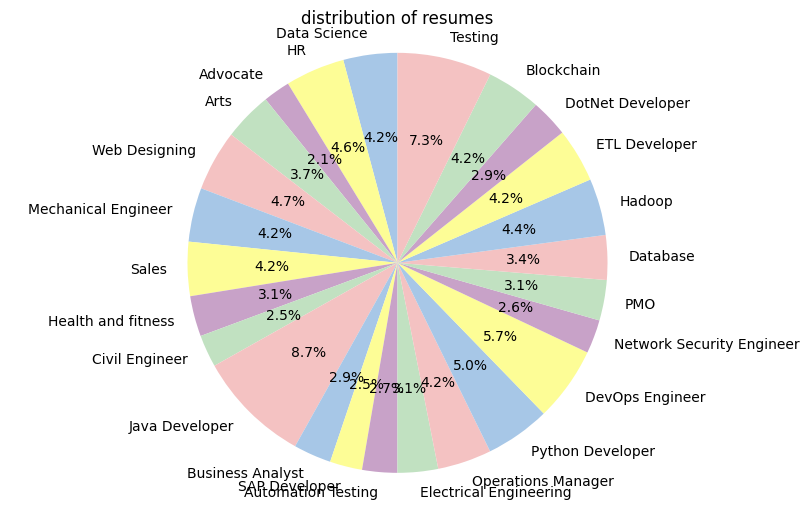

In [ ]:
#percentage distribution
plt.figure(figsize=(10, 6))
labels = category; values=z
colors = ['#A7C7E7','#FDFD96',"#C8A2C8","#C1E1C1","#F4C2C2"]
plt.pie(x=values, labels=labels, colors=colors,autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('distribution of resumes')
plt.show()

<Axes: xlabel='count', ylabel='Category'>

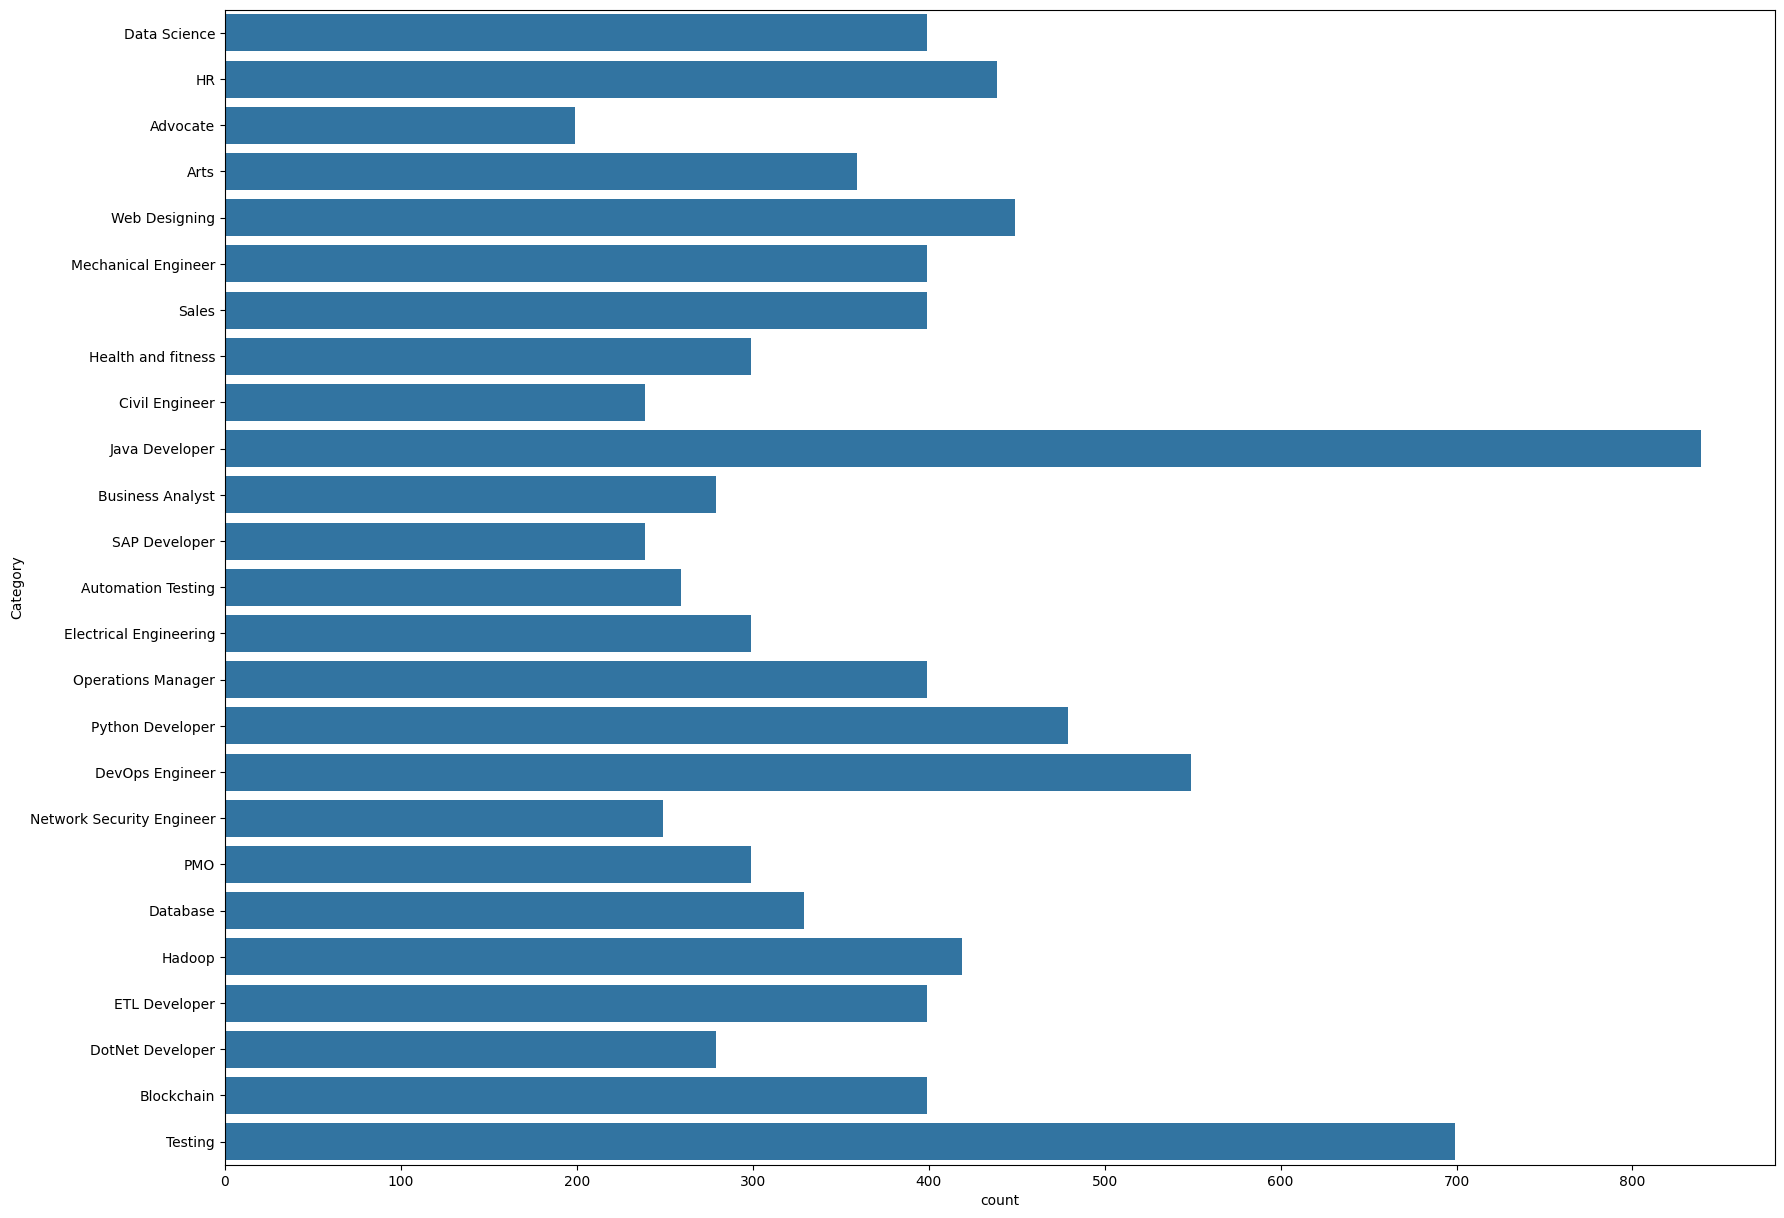

In [ ]:
#distribution
import seaborn as sns
plt.figure(figsize=(20,15));sns.countplot(y="Category",data=data)

In [ ]:
#java dev is the most, and advocate is the least
def head3(data):
    print("first three resumes to visualize data\n{}".format("-"*80))
    for i in range(3):
        x=data["Resume"][i]
        print("{}\n{}".format(x,"-"*80))
head3(data)

first three resumes to visualize data
--------------------------------------------------------------------------------
qwtnrvduof Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), vliwCrVTuFNfrHJMqDYjIudSSzMrlVhTpmnfKrPA
--------------------------------------------------------------------------------
qwtnrvduof Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of MrbNTGBqLmkK Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubun

In [ ]:
unique_resume=data.drop_duplicates(subset='Resume').reset_index(drop=True)
print(f"no of unique resumes = {len(unique_resume)}\n")
data=data.drop_duplicates(subset='Resume').reset_index(drop=True)
print("{:<26s}{}\n{}".format("Job Title","Number of Resumes","-"*43))
z=[]
for i in range(25):
    y=category[i]
    x=len(data[data['Category']==y]["Category"])
    print("{:<37s} = {:,.0f}".format(y,x));z.append(x)
print("{}\n{:<39s}{}".format("-"*43,"Total",sum(z)))

no of unique resumes = 189

Job Title                 Number of Resumes
-------------------------------------------
Data Science                          = 12
HR                                    = 13
Advocate                              = 11
Arts                                  = 6
Web Designing                         = 4
Mechanical Engineer                   = 6
Sales                                 = 6
Health and fitness                    = 6
Civil Engineer                        = 7
Java Developer                        = 14
Business Analyst                      = 8
SAP Developer                         = 7
Automation Testing                    = 8
Electrical Engineering                = 6
Operations Manager                    = 5
Python Developer                      = 7
DevOps Engineer                       = 8
Network Security Engineer             = 6
PMO                                   = 3
Database                              = 12
Hadoop                                =

distribution after dropping duplicates


<Axes: xlabel='count', ylabel='Category'>

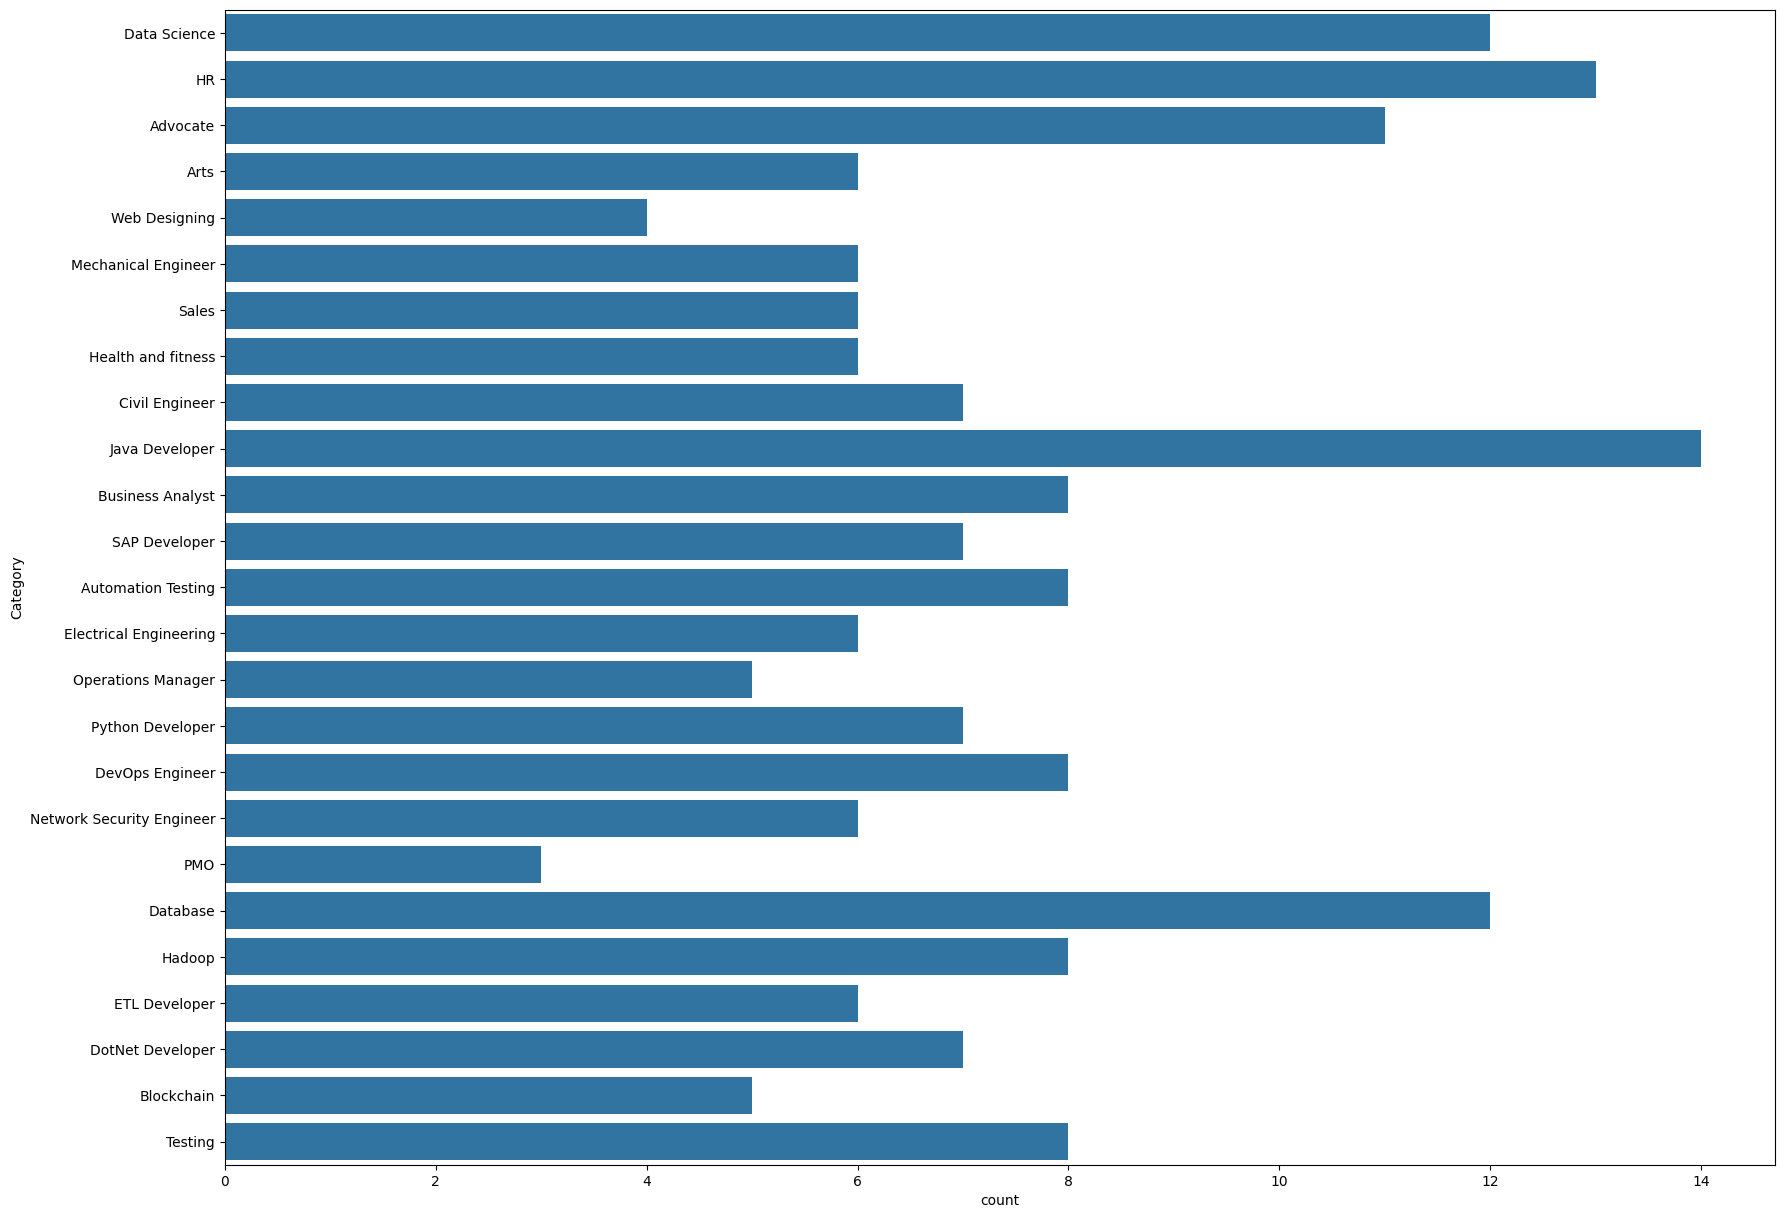

In [ ]:
#distribution
import seaborn as sns
print("distribution after dropping duplicates")
plt.figure(figsize=(20,15));sns.countplot(y="Category",data=data)

#text preprocessing

In [ ]:
#preprocessing includes removing the punctuation, stop words, special characters
# -> changing to lowercase, lemmatizing, pos tagging, chunking, ner

In [ ]:
#import libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [ ]:
#set all to lower
# data['Resume'] = data['Resume'].str.lower()
#text preprocessing, to remove punctuations and special characters
import re
def clean(doc):
    #remove specific strings of text
    doc = re.sub(r"qwtnrvduof","", doc)
    #remove hyperlinks
    doc=re.sub("http\S+\s*"," ",doc)
    doc=re.sub("RT|cc","",doc)
    doc=re.sub("#\S+","",doc)
    doc=re.sub("@\S+","",doc)
    #remove special characters
    doc=re.sub("[%s]" % re.escape("""'!""#$%^&*()+_-[\]:;{}~`<=>/?.,|""")," ",doc) #remove punctuations and others
    doc = re.sub(r'\b(?![CRr])[a-zA-Z]\b', '', doc) #remove standalone alphabets, except C and R because it is a programming language
    doc = re.sub(r'\bzz\b', '', doc)
    #remove whitespaces and tabs
    doc=re.sub("\s+"," ",doc);doc=re.sub(r"[^\x00-\x7f]",r" ",doc)
    doc=re.sub('\r', ' ', doc)
    doc=re.sub('\n', ' ', doc)
    doc=re.sub(r'^\s*|\s\s*',' ',doc).strip()
    return doc
data["cleaned text"]=data.Resume.apply(lambda x:clean(x))

In [ ]:
cleaned_data=data["cleaned text"]
print("first three resumes to visualize data\n{}".format("-"*80))
for i in range(3):
    x=cleaned_data[i]
    print("{}\n{}".format(x,"-"*80))

first three resumes to visualize data
--------------------------------------------------------------------------------
Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib vliwCrVTuFNfrHJMqDYjIudSSzMrlVhTpmnfKrPA
--------------------------------------------------------------------------------
Areas of Interest Deep Learning Control System Design Programming in Python Electric Machinery Web Development Analytics Technical Activities Hindustan Aeronautics Limited Bangalore For 4 weeks under the guidance of MrbNTGBqLmkK Satish Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab Python and Java LabView Python WebFrameWork Django Flask LTSPICE intermediate Languages and and MIPOWER intermediate Github GitBash Jupyter Notebook Xampp MySQL Basics Python Software Packages Interpreters Anaconda Python2 Python3 Pycharm Java IDE Eclipse Operating Systems Windows Ubuntu Debian Kali Linux Education Details January 2019 BckeKJOF

In [ ]:
import nltk
nltk.download('stopwords');nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
import string
stopwords=set(stopwords.words("english"))

#add or remove stop words -> stop_words.append('')

total_words=[]
sentences=data['cleaned text'].values
cleanSentences =""

for i in range(0,189):
    text=clean(sentences[i])
    cleanSentences+=text
    words=nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords and word not in string.punctuation:
            total_words.append(word)

word_freq_dist=nltk.FreqDist(total_words)
most_common=word_freq_dist.most_common(10)

print(most_common)

[('Exprience', 626), ('Details', 533), ('company', 521), ('months', 511), ('description', 465), ('Project', 298), ('1', 277), ('data', 226), ('year', 221), ('project', 219)]


In [ ]:
print(word_freq_dist.most_common()[:-11:-1]) #print the 10 least common words

[('yearBmAvcUxckM', 1), ('Webdriver', 1), ('ShnyYaPhDiNSNkcIWQTHKPCxqNxAuivPS', 1), ('Aggregate', 1), ('Chavan', 1), ('Yeshwantrao', 1), ('BNXCvUvbtfsEbWoLvAuiLy', 1), ('workerKlgxNYMQvnEducation', 1), ('leaderLzAHrUKSfh', 1), ('Belief', 1)]


In [ ]:
words = data['cleaned text'].str.split()

#find the word that are in >11 in length or so
all_words = [word for sublist in words for word in sublist]
long_words = [word for word in all_words if len(word) > 11]
print(f"number of long words found = {len(long_words)}\n")

number of long words found = 5450



In [ ]:
import nltk
from nltk.corpus import words as nltk_words
nltk.download('words')
english_words = set(nltk_words.words())

#function to remove the longwords that are not in dictionary
def remove_long_words(text):
    words_in_text = text.split()
    cleaned_words = [word for word in words_in_text if len(word) <= 11 or word.lower() in english_words]
    return ' '.join(cleaned_words)

data['cleaned text'] = data['cleaned text'].apply(remove_long_words)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
words = data['cleaned text'].str.split()
all_words = [word for sublist in words for word in sublist]
long_words = [word for word in all_words if len(word) > 10]
print(f"number of long words found = {len(long_words)}\n")

number of long words found = 4251



In [ ]:
cleaned_data=data["cleaned text"]
print("first three resumes to visualize data\n{}".format("-"*80))
for i in range(3):
    x=cleaned_data[i]
    print("{}\n{}".format(x,"-"*80))

first three resumes to visualize data
--------------------------------------------------------------------------------
Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib
--------------------------------------------------------------------------------
Areas of Interest Deep Learning Control System Design Programming in Python Electric Machinery Web Development Analytics Technical Activities Hindustan Aeronautics Limited Bangalore For 4 weeks under the guidance of Satish Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab Python and Java LabView Python Django Flask LTSPICE intermediate Languages and and MIPOWER intermediate Github GitBash Jupyter Notebook Xampp MySQL Basics Python Software Packages Anaconda Python2 Python3 Pycharm Java IDE Eclipse Operating Systems Windows Ubuntu Debian Kali Linux Education Details January 2019 Electrical and Electronics Engineering Manipal Institute of Technology January 2015 DEEK

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Re-importing the stopwords module
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

data['cleaned text'] = data['cleaned text'].apply(remove_stop_words)

random to check if dataset is processed well

In [ ]:
import random
data.reset_index(drop=True, inplace=True)
random_document = random.choice(data['cleaned text'])
print(random_document)

Education Details Bachelor Bachelor Commerce India Guru Nanak high school Sales


In [ ]:
data

,Category,Resume,cleaned text
0,Data Science,qwtnrvduof Skills * Programming Languages: Pyt...,Skills Programming Languages Python pandas num...
1,Data Science,"qwtnrvduof Areas of Interest Deep Learning, Co...",Areas Interest Deep Learning Control System De...
2,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
3,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
4,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",SKILLS C Basics IOT Python MATLAB Data Science...
...,...,...,...
184,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
185,Testing,Skill Set OS Windows XP/7/8/8bNTGBqLmkK1/10 Da...,Skill Set OS Windows XP 7 8 10 Database MYSQL ...
186,Testing,â¢ Good logical and analytical skills â¢ Pos...,Good logical analytical skills Positive attitu...
187,Testing,COMPUTER PROFICIENCY â¢ Basic: MS-Office (Pow...,COMPUTER PROFICIENCY Basic MS Office PowerPoin...


BERT fine tuning

In [ ]:
datalabels = {}
for idx, label in enumerate(data.Category.unique()):
    datalabels[label] = idx
datalabels

{'Data Science': 0,
 'HR': 1,
 'Advocate': 2,
 'Arts': 3,
 'Web Designing': 4,
 'Mechanical Engineer': 5,
 'Sales': 6,
 'Health and fitness': 7,
 'Civil Engineer': 8,
 'Java Developer': 9,
 'Business Analyst': 10,
 'SAP Developer': 11,
 'Automation Testing': 12,
 'Electrical Engineering': 13,
 'Operations Manager': 14,
 'Python Developer': 15,
 'DevOps Engineer': 16,
 'Network Security Engineer': 17,
 'PMO': 18,
 'Database': 19,
 'Hadoop': 20,
 'ETL Developer': 21,
 'DotNet Developer': 22,
 'Blockchain': 23,
 'Testing': 24}

In [ ]:
data['labels'] = data.Category.apply(func=lambda x: datalabels[x])
data['labels'] = data.labels.astype(np.int64)

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data,test_size=0.3,shuffle=True,random_state=101)
train_data.shape, test_data.shape

((132, 4), (57, 4))

In [ ]:
!pip install keras_preprocessing

In [ ]:
import numpy
import pandas
try:
    import torch
except:
    !pip -qq install torch

import torch.nn as nn

try:
    import transformers
except:
    !pip -qq install transformers

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import os

# Prepare sentences and labels
sentences = train_data['cleaned text'].values
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
labels = train_data['labels'].values
labels = torch.tensor(labels, dtype=torch.long)

# Tokenize sentences using BERT tokenizer
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

# Pad sequences and create attention masks
from keras_preprocessing.sequence import pad_sequences
MAX_LEN = 512
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

attention_masks = []
for sequence in input_ids:

    sequence_mask = [float(id > 0) for id in sequence]
    attention_masks.append(sequence_mask)

# Split data into training and validation sets
from sklearn.model_selection import train_test_split
training_inputs, validation_inputs, training_labels, validation_labels, training_masks, validation_masks = train_test_split(
    input_ids, labels, attention_masks,
    random_state=2018, test_size=0.2)

# Create DataLoader for training set
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 16
training_data = TensorDataset(torch.tensor(training_inputs), torch.tensor(training_masks), torch.tensor(training_labels))
training_sampler = RandomSampler(training_data)
training_dataloader = DataLoader(training_data, sampler=training_sampler, batch_size=batch_size)

# Create DataLoader for validation set
validation_data = TensorDataset(torch.tensor(validation_inputs), torch.tensor(validation_masks), torch.tensor(validation_labels))
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

# Configure BERT model for sequence classification
from transformers import BertConfig, BertModel
configuration = BertConfig()
model = BertModel(configuration)
configuration = model.config

from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=25)
model = nn.DataParallel(model)
model.to(device)

from transformers import AdamW
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]
optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5, betas=(0.92, 0.999) ,eps=1e-08, weight_decay=0.01, correct_bias=False, no_deprecation_warning=True)

def flat_accuracy(predicted_labels, labels):
    predicted_labels = numpy.argmax(predicted_labels.to('cpu').numpy(), axis=1).flatten()
    labels = labels.to('cpu').numpy().flatten()
    return numpy.sum(predicted_labels == labels) / len(labels)

# Train the BERT model
from tqdm import trange
epochs = 45
training_losses=[]
validation_accuracies=[]

from torch.optim.lr_scheduler import LambdaLR

# Define a lambda function for learning rate scheduling
lr_lambda = lambda epoch: 0.9 ** epoch

# Create the LambdaLR scheduler
scheduler = LambdaLR(optimizer, lr_lambda=lr_lambda)


for epoch in trange(epochs, desc="Epoch"):
    model.train()
    training_loss = 0
    training_steps = 0

    for step, batch in enumerate(training_dataloader):
        inputs = batch[0].to(device)
        attention_masks = batch[1].to(device)
        labels = batch[2].to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        training_loss += loss.item()
        training_steps += 1

        training_losses.append(loss.item())

    average_training_loss = training_loss/training_steps
    print("Epoch {}: Average Training Loss: {}".format(epoch+1, average_training_loss))

    model.eval()
    validation_accuracy = 0
    validation_steps = 0

    for batch in validation_dataloader:
        inputs = batch[0].to(device)
        attention_masks = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            outputs = model(inputs, attention_mask=attention_masks, labels=labels)

        logits = outputs.logits
        temp_validation_accuracy = flat_accuracy(logits, labels)
        validation_accuracy += temp_validation_accuracy
        validation_steps += 1

    average_validation_accuracy = validation_accuracy/validation_steps
    validation_accuracies.append(average_validation_accuracy)
    print("Epoch {}: Validation Accuracy: {}".format(epoch+1, average_validation_accuracy))

sentences = train_data['cleaned text'].values
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
labels = train_data['labels'].values

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

input_ids = [tokenizer.convert_tokens_to_ids(tokens) for tokens in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

attention_masks = [[float(i > 0) for i in seq] for seq in input_ids]

input_ids = torch.tensor(input_ids)
attention_masks = torch.tensor(attention_masks)
labels = torch.tensor(labels)

prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_dataloader = DataLoader(prediction_data, batch_size=batch_size)

model.eval()
logits_set = []
labels_set = []

for batch in prediction_dataloader:
    batch_input_ids, batch_attention_masks, batch_labels = batch
    batch_input_ids, batch_attention_masks, batch_labels = batch_input_ids.to(device), batch_attention_masks.to(device), batch_labels.to(device)

    with torch.no_grad():
        outputs = model(batch_input_ids, attention_mask=batch_attention_masks)
        logits = outputs.logits

    logits_set.append(logits.cpu().numpy())
    labels_set.append(batch_labels.cpu().numpy())

from sklearn.metrics import matthews_corrcoef
matthews_set = []

# Calculate Matthews correlation coefficient for each batch
for i in range(len(labels_set)):
    mcc = matthews_corrcoef(labels_set[i], numpy.argmax(logits_set[i], axis=1).flatten())
    matthews_set.append(mcc)

for i, mcc in enumerate(matthews_set):
    print(f"Batch {i + 1}: MCC = {mcc}")

# Calculate the overall Matthews correlation coefficient
overall_mcc = numpy.mean(matthews_set)
print(f"\nOverall MCC: {overall_mcc}")

<ipython-input-52-3fe59a336340>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  training_data = TensorDataset(torch.tensor(training_inputs), torch.tensor(training_masks), torch.tensor(training_labels))
<ipython-input-52-3fe59a336340>:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  validation_data = TensorDataset(torch.tensor(validation_inputs), torch.tensor(validation_masks), torch.tensor(validation_labels))
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions an

Epoch 1: Average Training Loss: 3.271527426583426
Epoch 1: Validation Accuracy: 0.0


Epoch:   4%|▍         | 2/45 [00:05<01:49,  2.54s/it]

Epoch 2: Average Training Loss: 3.152896983282907
Epoch 2: Validation Accuracy: 0.1534090909090909


Epoch:   7%|▋         | 3/45 [00:07<01:46,  2.53s/it]

Epoch 3: Average Training Loss: 2.990406479154314
Epoch 3: Validation Accuracy: 0.23011363636363635


Epoch:   9%|▉         | 4/45 [00:10<01:43,  2.52s/it]

Epoch 4: Average Training Loss: 2.7125473703656877
Epoch 4: Validation Accuracy: 0.26136363636363635


Epoch:  11%|█         | 5/45 [00:12<01:40,  2.52s/it]

Epoch 5: Average Training Loss: 2.4243877955845425
Epoch 5: Validation Accuracy: 0.3835227272727273


Epoch:  13%|█▎        | 6/45 [00:15<01:38,  2.52s/it]

Epoch 6: Average Training Loss: 2.1005176986966814
Epoch 6: Validation Accuracy: 0.4005681818181818


Epoch:  16%|█▌        | 7/45 [00:17<01:35,  2.52s/it]

Epoch 7: Average Training Loss: 1.8383477585656303
Epoch 7: Validation Accuracy: 0.4914772727272727


Epoch:  18%|█▊        | 8/45 [00:20<01:33,  2.52s/it]

Epoch 8: Average Training Loss: 1.702721152986799
Epoch 8: Validation Accuracy: 0.4602272727272727


Epoch:  20%|██        | 9/45 [00:22<01:30,  2.52s/it]

Epoch 9: Average Training Loss: 1.409406270299639
Epoch 9: Validation Accuracy: 0.5681818181818181


Epoch:  22%|██▏       | 10/45 [00:25<01:28,  2.52s/it]

Epoch 10: Average Training Loss: 1.2102821469306946
Epoch 10: Validation Accuracy: 0.5994318181818181


Epoch:  24%|██▍       | 11/45 [00:27<01:25,  2.52s/it]

Epoch 11: Average Training Loss: 1.061772542340415
Epoch 11: Validation Accuracy: 0.5994318181818181


Epoch:  27%|██▋       | 12/45 [00:30<01:23,  2.52s/it]

Epoch 12: Average Training Loss: 0.9983311380658831
Epoch 12: Validation Accuracy: 0.6306818181818181


Epoch:  29%|██▉       | 13/45 [00:32<01:20,  2.52s/it]

Epoch 13: Average Training Loss: 0.8468811426843915
Epoch 13: Validation Accuracy: 0.6306818181818181


Epoch:  31%|███       | 14/45 [00:35<01:18,  2.52s/it]

Epoch 14: Average Training Loss: 0.7425796730177743
Epoch 14: Validation Accuracy: 0.6306818181818181


Epoch:  33%|███▎      | 15/45 [00:37<01:15,  2.52s/it]

Epoch 15: Average Training Loss: 0.6671349789415087
Epoch 15: Validation Accuracy: 0.6306818181818181


Epoch:  36%|███▌      | 16/45 [00:40<01:13,  2.52s/it]

Epoch 16: Average Training Loss: 0.5509832416261945
Epoch 16: Validation Accuracy: 0.6306818181818181


Epoch:  38%|███▊      | 17/45 [00:42<01:10,  2.52s/it]

Epoch 17: Average Training Loss: 0.44217054758753094
Epoch 17: Validation Accuracy: 0.6306818181818181


Epoch:  40%|████      | 18/45 [00:45<01:07,  2.52s/it]

Epoch 18: Average Training Loss: 0.36975427184786114
Epoch 18: Validation Accuracy: 0.6306818181818181


Epoch:  42%|████▏     | 19/45 [00:47<01:05,  2.52s/it]

Epoch 19: Average Training Loss: 0.339911835534232
Epoch 19: Validation Accuracy: 0.5539772727272727


Epoch:  44%|████▍     | 20/45 [00:50<01:02,  2.52s/it]

Epoch 20: Average Training Loss: 0.36157566734722685
Epoch 20: Validation Accuracy: 0.6619318181818181


Epoch:  47%|████▋     | 21/45 [00:52<01:00,  2.52s/it]

Epoch 21: Average Training Loss: 0.30039925021784647
Epoch 21: Validation Accuracy: 0.6306818181818181


Epoch:  49%|████▉     | 22/45 [00:55<00:57,  2.52s/it]

Epoch 22: Average Training Loss: 0.2936969016279493
Epoch 22: Validation Accuracy: 0.6619318181818181


Epoch:  51%|█████     | 23/45 [00:57<00:55,  2.52s/it]

Epoch 23: Average Training Loss: 0.2603860433612551
Epoch 23: Validation Accuracy: 0.6931818181818181


Epoch:  53%|█████▎    | 24/45 [01:00<00:52,  2.52s/it]

Epoch 24: Average Training Loss: 0.23146013915538788
Epoch 24: Validation Accuracy: 0.6931818181818181


Epoch:  56%|█████▌    | 25/45 [01:03<00:50,  2.52s/it]

Epoch 25: Average Training Loss: 0.1981701978615352
Epoch 25: Validation Accuracy: 0.6931818181818181


Epoch:  58%|█████▊    | 26/45 [01:05<00:47,  2.52s/it]

Epoch 26: Average Training Loss: 0.19348034262657166
Epoch 26: Validation Accuracy: 0.6619318181818181


Epoch:  60%|██████    | 27/45 [01:08<00:45,  2.52s/it]

Epoch 27: Average Training Loss: 0.16053485018866404
Epoch 27: Validation Accuracy: 0.6619318181818181


Epoch:  62%|██████▏   | 28/45 [01:10<00:42,  2.52s/it]

Epoch 28: Average Training Loss: 0.15311053821018764
Epoch 28: Validation Accuracy: 0.6931818181818181


Epoch:  64%|██████▍   | 29/45 [01:13<00:40,  2.52s/it]

Epoch 29: Average Training Loss: 0.18859642850501196
Epoch 29: Validation Accuracy: 0.6931818181818181


Epoch:  67%|██████▋   | 30/45 [01:15<00:37,  2.52s/it]

Epoch 30: Average Training Loss: 0.15376414677926473
Epoch 30: Validation Accuracy: 0.6619318181818181


Epoch:  69%|██████▉   | 31/45 [01:18<00:35,  2.52s/it]

Epoch 31: Average Training Loss: 0.12774218831743514
Epoch 31: Validation Accuracy: 0.6164772727272727


Epoch:  71%|███████   | 32/45 [01:20<00:32,  2.52s/it]

Epoch 32: Average Training Loss: 0.18779953036989486
Epoch 32: Validation Accuracy: 0.6164772727272727


Epoch:  73%|███████▎  | 33/45 [01:23<00:30,  2.52s/it]

Epoch 33: Average Training Loss: 0.1197096545781408
Epoch 33: Validation Accuracy: 0.6931818181818181


Epoch:  76%|███████▌  | 34/45 [01:25<00:27,  2.52s/it]

Epoch 34: Average Training Loss: 0.20718219982726233
Epoch 34: Validation Accuracy: 0.7386363636363636


Epoch:  78%|███████▊  | 35/45 [01:28<00:25,  2.52s/it]

Epoch 35: Average Training Loss: 0.1136281665946756
Epoch 35: Validation Accuracy: 0.6619318181818181


Epoch:  80%|████████  | 36/45 [01:30<00:22,  2.52s/it]

Epoch 36: Average Training Loss: 0.10773470891373498
Epoch 36: Validation Accuracy: 0.6931818181818181


Epoch:  82%|████████▏ | 37/45 [01:33<00:20,  2.52s/it]

Epoch 37: Average Training Loss: 0.08921535526003156
Epoch 37: Validation Accuracy: 0.7386363636363636


Epoch:  84%|████████▍ | 38/45 [01:35<00:17,  2.52s/it]

Epoch 38: Average Training Loss: 0.08686777097838265
Epoch 38: Validation Accuracy: 0.7698863636363636


Epoch:  87%|████████▋ | 39/45 [01:38<00:15,  2.52s/it]

Epoch 39: Average Training Loss: 0.08233426777379853
Epoch 39: Validation Accuracy: 0.8011363636363636


Epoch:  89%|████████▉ | 40/45 [01:40<00:12,  2.52s/it]

Epoch 40: Average Training Loss: 0.07923801402960505
Epoch 40: Validation Accuracy: 0.8011363636363636


Epoch:  91%|█████████ | 41/45 [01:43<00:10,  2.52s/it]

Epoch 41: Average Training Loss: 0.08137355957712446
Epoch 41: Validation Accuracy: 0.8011363636363636


Epoch:  93%|█████████▎| 42/45 [01:45<00:07,  2.52s/it]

Epoch 42: Average Training Loss: 0.07121420172708375
Epoch 42: Validation Accuracy: 0.8011363636363636


Epoch:  96%|█████████▌| 43/45 [01:48<00:05,  2.52s/it]

Epoch 43: Average Training Loss: 0.07230012491345406
Epoch 43: Validation Accuracy: 0.8011363636363636


Epoch:  98%|█████████▊| 44/45 [01:50<00:02,  2.52s/it]

Epoch 44: Average Training Loss: 0.06533278524875641
Epoch 44: Validation Accuracy: 0.8011363636363636
Epoch 45: Average Training Loss: 0.06131036366735186


Epoch: 100%|██████████| 45/45 [01:53<00:00,  2.52s/it]

Epoch 45: Validation Accuracy: 0.8011363636363636


Batch 1: MCC = 1.0
Batch 2: MCC = 1.0
Batch 3: MCC = 1.0
Batch 4: MCC = 0.9347826086956522
Batch 5: MCC = 0.9345067267136572
Batch 6: MCC = 0.9336283185840708
Batch 7: MCC = 0.8712526594399564
Batch 8: MCC = 1.0
Batch 9: MCC = 1.0

Overall MCC: 0.9637967014925929


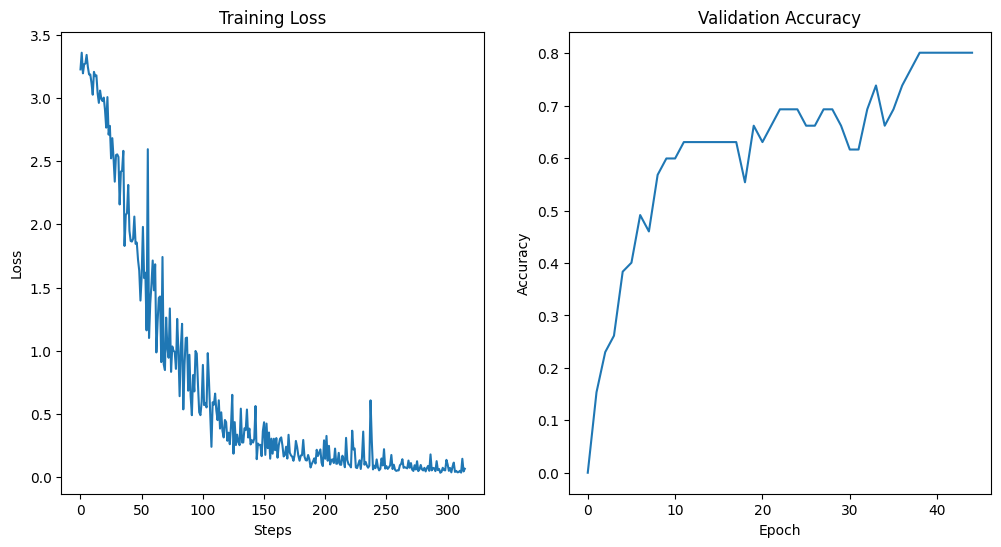

In [ ]:
# Plot training and validation curves
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(training_losses, label='Training Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training Loss')

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')

plt.show()

In [ ]:
#though the training loss and validation accuracy graphs are generally not smooth, it could be attributed to the small data size
#and the training loss has a decent slope

# Optimization

In [ ]:
avg_length = sum([len(text.split()) for text in data["cleaned text"]]) / len(data["cleaned text"])
avg_length

255.55026455026456

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['cleaned text'], data['labels'], test_size=0.2, random_state=42)

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
X_train_tokenized = tokenizer(X_train.tolist(), padding=True, truncation=True, max_length=512, return_tensors="pt")
X_test_tokenized = tokenizer(X_test.tolist(), padding=True, truncation=True, max_length=512, return_tensors="pt")

In [ ]:
modeldis = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=25)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader

# Load your dataset
# Make sure to have X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(data['cleaned text'], data['labels'], test_size=0.2, random_state=42)

# Define hyperparameters
batch_size = 16
max_length = 512
learning_rate = 2e-5
num_epochs = 30

# Initialize the DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=25)

# Tokenize and prepare the input data
X_train_tokenized = tokenizer(X_train.tolist(), padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')
X_test_tokenized = tokenizer(X_test.tolist(), padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')

# Convert labels to tensors
y_train_tensor = torch.tensor(y_train.tolist(), dtype=torch.long)  # Convert pandas Series to Python list
y_test_tensor = torch.tensor(y_test.tolist(), dtype=torch.long)

# Prepare PyTorch DataLoader
train_dataset = torch.utils.data.TensorDataset(X_train_tokenized['input_ids'],
                                                X_train_tokenized['attention_mask'],
                                                y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test_tokenized['input_ids'],
                                               X_test_tokenized['attention_mask'],
                                               y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize optimizer and loss function
optimizer = AdamW(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1} - Training loss: {running_loss / len(train_loader)}")

# Evaluation
model.eval()
predictions = []
true_labels = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        _, predicted = torch.max(logits, dim=1)
        predictions.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy on test set: {accuracy}")


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  Decoupled weight decay to apply.


Epoch 1 - Training loss: 3.2183164834976195
Epoch 2 - Training loss: 3.166152596473694
Epoch 3 - Training loss: 3.0997549533843993
Epoch 4 - Training loss: 3.0221349477767943
Epoch 5 - Training loss: 2.940482234954834
Epoch 6 - Training loss: 2.789352631568909
Epoch 7 - Training loss: 2.6606921195983886
Epoch 8 - Training loss: 2.4834368228912354
Epoch 9 - Training loss: 2.3253244400024413
Epoch 10 - Training loss: 2.1379693150520325
Epoch 11 - Training loss: 1.9600104212760925
Epoch 12 - Training loss: 1.7830199480056763
Epoch 13 - Training loss: 1.608726155757904
Epoch 14 - Training loss: 1.44158074259758
Epoch 15 - Training loss: 1.3054939746856689
Epoch 16 - Training loss: 1.17757528424263
Epoch 17 - Training loss: 1.0253428161144256
Epoch 18 - Training loss: 0.9345285713672637
Epoch 19 - Training loss: 0.8038994431495666
Epoch 20 - Training loss: 0.7461969375610351
Epoch 21 - Training loss: 0.634923192858696
Epoch 22 - Training loss: 0.5802611678838729
Epoch 23 - Training loss: 0.

In [ ]:
#DistilBERT is a distilled version of the original BERT model,
#meaning it's smaller and faster while retaining much of the performance.
#This makes it more efficient for training and inference, especially when computational resources are limited.
#the model generalizes better to new, unseen data, which is particularly useful when working with small datasets

#Resume classification

prediction with BERT

In [ ]:
sentences = test_data['cleaned text'].values
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
labels = test_data['labels'].values
labels = torch.tensor(labels, dtype=torch.long)

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

input_ids = [tokenizer.convert_tokens_to_ids(tokens) for tokens in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

attention_masks = [[float(i > 0) for i in seq] for seq in input_ids]

input_ids = torch.tensor(input_ids)
attention_masks = torch.tensor(attention_masks)
labels = torch.tensor(labels)

prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_dataloader = DataLoader(prediction_data, batch_size=batch_size)

# Evaluate the BERT model on the out-of-domain dataset
model.eval()
logits_set = []
labels_set = []

for batch in prediction_dataloader:
    batch_input_ids, batch_attention_masks, batch_labels = batch
    batch_input_ids, batch_attention_masks, batch_labels = batch_input_ids.to(device), batch_attention_masks.to(device), batch_labels.to(device)

    with torch.no_grad():
        outputs = model(batch_input_ids, attention_mask=batch_attention_masks)
        logits = outputs.logits

    logits_set.append(logits.cpu().numpy())
    labels_set.append(batch_labels.cpu().numpy())

matthews_set = []

# Calculate Matthews correlation coefficient for each batch
for i in range(len(labels_set)):
    mcc = matthews_corrcoef(labels_set[i], numpy.argmax(logits_set[i], axis=1).flatten())
    matthews_set.append(mcc)

for i, mcc in enumerate(matthews_set):
    print(f"Batch {i + 1}: MCC = {mcc}")

# Calculate the overall Matthews correlation coefficient
overall_mcc = numpy.mean(matthews_set)
print(f"\nOverall MCC: {overall_mcc}")

<ipython-input-65-337d770cc466>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)


Batch 1: MCC = 0.5478260869565217
Batch 2: MCC = 0.6823014005184405
Batch 3: MCC = 0.7489247664799692
Batch 4: MCC = 0.7650368522374495

Overall MCC: 0.6860222765480952


In [ ]:
#testing with val dataset
import numpy as np
from transformers import BertTokenizer
from keras.preprocessing.sequence import pad_sequences

model.eval()

sentences =test_data['cleaned text'].values[:10].tolist()
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]

from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

from keras_preprocessing.sequence import pad_sequences
MAX_LEN = 512
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

attention_masks = []
for sequence in input_ids:
    sequence_mask = [float(id > 0) for id in sequence]
    attention_masks.append(sequence_mask)

input_ids = torch.tensor(input_ids).to(device)
attention_masks = torch.tensor(attention_masks).to(device)

# Perform inference
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_masks)
    logits = outputs.logits

# Optionally, apply a softmax function to convert logits into probabilities
probabilities = nn.functional.softmax(logits, dim=1)

# Collect the predicted label or probability
predicted_label = torch.argmax(probabilities, dim=1).tolist()
# Or, if you want to collect probabilities, use: predicted_probability = probabilities[:, 1].item()

# Print the predicted probability
predicted_probability = probabilities[:, 1].tolist()
print(f"Predicted Labels:\t{predicted_label}\nActual Labels:\t\t{test_data['labels'].head(10).tolist()}\n\nPredicted Probability:\t{predicted_probability}")

Predicted Labels:	[5, 9, 12, 2, 12, 2, 15, 6, 17, 1]
Actual Labels:		[5, 9, 12, 2, 24, 2, 15, 3, 17, 14]

Predicted Probability:	[0.0007121553062461317, 0.0005489079630933702, 0.003162616631016135, 0.0026868758723139763, 0.0020770395640283823, 0.0022969981655478477, 0.002876691520214081, 0.16325867176055908, 0.011693322099745274, 0.427080363035202]


classified 7/10 correctly

In [ ]:
#predict random sentence
model.eval()

sentences = ["matplotlib java mumbai Chennai Services TECHNOLOGY work many years exprience","professional webdriver","C R skilled i want to be professional artist","C R matplotlib python highly skilled i want to be professional artist"]
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]

from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

from keras_preprocessing.sequence import pad_sequences
MAX_LEN = 512
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

attention_masks = []
for sequence in input_ids:
    sequence_mask = [float(id > 0) for id in sequence]
    attention_masks.append(sequence_mask)

input_ids = torch.tensor(input_ids).to(device)
attention_masks = torch.tensor(attention_masks).to(device)

# Perform inference
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_masks)
    logits = outputs.logits

probabilities = nn.functional.softmax(logits, dim=1)

predicted_label = torch.argmax(probabilities, dim=1).tolist()

predicted_probability = probabilities[:, 1].tolist()
for i in range(4):
  print(f"Sentence {i+1}: {sentences[i]}")
print(f"\n\nPredicted Labels:\t{predicted_label}\n\nPredicted Probability:\t{predicted_probability}")
def find(number):
  for key, value in datalabels.items():
    if value == number:
        return key
print(f"\nJob 9 = {find(9)}\nJob 24 = {find(24)}\nJob 3 = {find(3)}\nJob 0 = {find(0)}")

Sentence 1: [CLS] matplotlib java mumbai Chennai Services TECHNOLOGY work many years exprience [SEP]
Sentence 2: [CLS] professional webdriver [SEP]
Sentence 3: [CLS] C R skilled i want to be professional artist [SEP]
Sentence 4: [CLS] C R matplotlib python highly skilled i want to be professional artist [SEP]


Predicted Labels:	[9, 24, 3, 0]

Predicted Probability:	[0.00360056827776134, 0.054778166115283966, 0.01048512663692236, 0.0049043879844248295]

Job 9 = Java Developer
Job 24 = Testing
Job 3 = Arts
Job 0 = Data Science


prediction with DistilBERT

In [ ]:
sentences =test_data['cleaned text'].values[:10].tolist()
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
model.eval()
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def predict(text):
    # Tokenize the input text
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")

    # Perform inference
    outputs = model(**inputs)

    # Get predicted labels
    predicted_class = torch.argmax(outputs.logits, dim=1).item()

    return predicted_class
predicted=[]
# Example usage
input_text = test_data['cleaned text'].values[:20].tolist()
for i in range(len(input_text)):
  predicted_label = predict(input_text[i])
  predicted.append(predicted_label)

def find(number):
  for key, value in datalabels.items():
    if value == number:
        return key
print(f"predicted labels:\t{predicted}\nActual Labels:\t\t{test_data['labels'].head(20).tolist()}")

predicted labels:	[5, 9, 12, 2, 24, 2, 15, 3, 17, 14, 2, 1, 3, 17, 19, 21, 22, 15, 20, 17]
Actual Labels:		[5, 9, 12, 2, 24, 2, 15, 3, 17, 14, 2, 1, 3, 17, 19, 21, 22, 15, 20, 17]


In [ ]:
pred=[]
input_text=["matplotlib java mumbai Chennai Services TECHNOLOGY work many years exprience","professional webdriver","C R skilled i want to be professional artist","C R matplotlib python highly skilled i want to be professional artist"]
for i in range(len(input_text)):
  predicted_label = predict(input_text[i])
  pred.append(predicted_label)

def find(number):
  for key, value in datalabels.items():
    if value == number:
        return key
print(f"predicted labels:\t{pred}")
print(f"\nJob 9 = {find(9)}\nJob 5 = {find(5)}\nJob 3 = {find(3)}\nJob 15 = {find(15)}")

predicted labels:	[9, 5, 3, 15]

Job 9 = Java Developer
Job 5 = Mechanical Engineer
Job 3 = Arts
Job 15 = Python Developer
